<a href="https://colab.research.google.com/github/Ghada-Bel/TP-ML/blob/main/MLTP_1_Pr%C3%A9traitement_des_donn%C3%A9es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing needed libraries

In [6]:
!pip install tabula-py


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 115.4 MB/s eta 0:00:00


In [7]:
import numpy as np
import pandas as pd
import matplotlib as plt
import tabula




Importing Data file and converting it to csv


In [8]:
from google.colab import files
uploaded = files.upload()

Saving DataTp1.pdf to DataTp1.pdf


In [9]:
tabula.convert_into("DataTp1.pdf", "output.csv", output_format="csv", pages='all')

importing the Data

In [11]:
df = pd.read_csv('output.csv')
print(df.head())

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes


Exploring the Data

In [12]:
print(df.info())
print(df.isnull().sum())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes
None
Country      0
Age          1
Salary       1
Purchased    0
dtype: int64
             Age        Salary
count   9.000000      9.000000
mean   38.777778  63777.777778
std     7.693793  12265.579662
min    27.000000  48000.000000
25%    35.000000  54000.000000
50%    38.000000  61000.000000
75%    44.000000  72000.000000
max    50.000000  83000.000000


Preprocessing Data

In [13]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:, 1:3] = imputer.fit_transform(X[:, 1:3])  # Exemple: colonnes 1 et 2

In [15]:
df = pd.get_dummies(df, drop_first=True)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

Viz

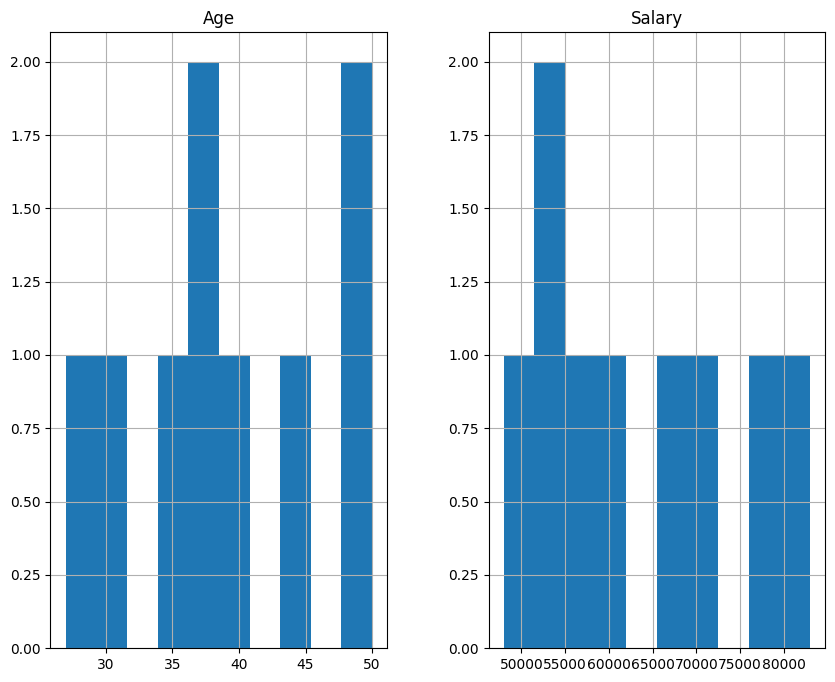

In [17]:
import matplotlib.pyplot as plt
df.hist(figsize=(10, 8))
plt.show()


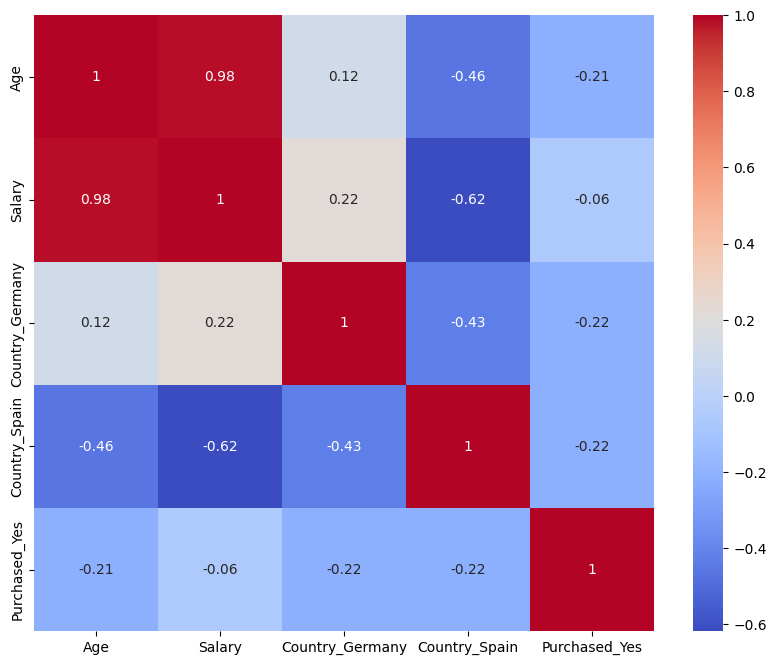

In [18]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()
